In [1]:
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
import os

In [2]:
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 18
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
mpl.rcParams['hatch.linewidth'] = 0.7

colors = ['#FF99A0', '#C8C8CB', '#87E7B0', '#66CCFF']
methods = ['XBM', 'Naive', 'QWC', 'GC']

In [3]:
def get_abs_error(results, method):
    abs_err_dict = {}

    abs_errs = []
    for res in results[method]:
        gt   = res['GT']
        ibmq = res['IBMQ']
        abs_errs += [np.abs(gt-ibmq)]
    return np.mean(abs_errs), np.std(abs_errs), np.array(abs_errs)


def get_rel_error(results, method):
    abs_err_dict = {}

    abs_errs = []
    for res in results[method]:
        gt   = res['GT']
        ibmq = res['IBMQ']
        abs_errs += [np.abs(gt-ibmq)/np.abs(gt)]
    return np.mean(abs_errs), np.std(abs_errs), np.array(abs_errs)

# $\psi_0=\psi_1$

In [4]:
def get_results(f_header, f_footer, min_qubits=1):
    
    methods = ['XBM', 'Naive', 'QWC', 'GC']

    nb_qubits_list = []
    abs_errors_mean_list = []
    abs_errors_std_list = []
    rel_errors_mean_list = []
    rel_errors_std_list = []
    time_grouping_mean_list = []
    time_grouping_std_list = []
    time_ibmq_mean_list = []
    time_ibmq_std_list = []

    nb_qubits = min_qubits - 1
    while True:
        
        nb_qubits += 1

        print(f_header+str(nb_qubits)+f_footer)
        if not os.path.isfile(f_header+str(nb_qubits)+f_footer):
            break
            
        with open(f_header+str(nb_qubits)+f_footer, 'rb') as f:
            results = pickle.load(f)

        nb_qubits_list += [nb_qubits]
        foo = []
        bar = []
        hoge = []
        piyo = []
        for method in methods:
            abs_errors = get_abs_error(results, method)
            rel_errors = get_rel_error(results, method)
            foo += [abs_errors[0]]
            bar += [abs_errors[1]]
            hoge += [rel_errors[0]]
            piyo += [rel_errors[1]]
        abs_errors_mean_list += [foo]
        abs_errors_std_list += [bar]
        rel_errors_mean_list += [hoge]
        rel_errors_std_list += [piyo]

        time_grouping_mean = []
        time_grouping_std = []
        time_ibmq_mean = []
        time_ibmq_std = []
        for key in methods:
            foo = []
            bar = []
            for res in results[key]:
                foo += [res['term_grouping']]
                baz = 0.
                for r in res['results(IBMQ)']:
                    baz += r['time_taken']
                bar += [baz]
            time_grouping_mean += [np.mean(foo)]
            time_grouping_std += [np.std(foo)]
            time_ibmq_mean += [np.mean(bar)]
            time_ibmq_std += [np.std(bar)]

        time_grouping_mean_list += [time_grouping_mean]
        time_grouping_std_list += [time_grouping_std]
        time_ibmq_mean_list += [time_ibmq_mean]
        time_ibmq_std_list += [time_ibmq_std]

    abs_errors_mean_list = np.array(abs_errors_mean_list)
    abs_errors_std_list = np.array(abs_errors_std_list)
    rel_errors_mean_list = np.array(rel_errors_mean_list)
    rel_errors_std_list = np.array(rel_errors_std_list)
    time_grouping_mean_list = np.array(time_grouping_mean_list)
    time_grouping_std_list = np.array(time_grouping_std_list)
    time_ibmq_mean_list = np.array(time_ibmq_mean_list)
    time_ibmq_std_list = np.array(time_ibmq_std_list)
    
    return nb_qubits_list, abs_errors_mean_list, abs_errors_std_list, rel_errors_mean_list, rel_errors_std_list, time_grouping_mean_list, time_grouping_std_list, time_ibmq_mean_list, time_ibmq_std_list

In [5]:
nb_qubits_list, abs_errors_mean_list, abs_errors_std_list, rel_errors_mean_list, rel_errors_std_list, time_grouping_mean_list, time_grouping_std_list, time_ibmq_mean_list, time_ibmq_std_list = get_results('results_real_device_kawasaki_', 'qubits.pkl')

results_real_device_kawasaki_1qubits.pkl
results_real_device_kawasaki_2qubits.pkl
results_real_device_kawasaki_3qubits.pkl
results_real_device_kawasaki_4qubits.pkl
results_real_device_kawasaki_5qubits.pkl
results_real_device_kawasaki_6qubits.pkl


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


results_real_device_kawasaki_7qubits.pkl
results_real_device_kawasaki_8qubits.pkl


Text(0, 0.5, 'Absolute error')

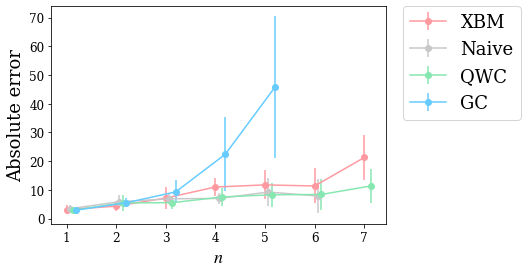

In [6]:
for i in range(len(methods)):
    plt.errorbar(np.array(nb_qubits_list)+i/15., abs_errors_mean_list[:,i], yerr=abs_errors_std_list[:,i], label=methods[i], marker='o', c=colors[i])
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.xlabel('$n$')
plt.ylabel('Absolute error')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


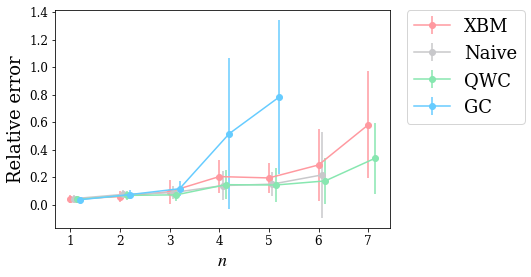

In [7]:
for i in range(len(methods)):
    plt.errorbar(np.array(nb_qubits_list)+i/15., rel_errors_mean_list[:,i], yerr=rel_errors_std_list[:,i], label=methods[i], marker='o', c=colors[i])
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.xlabel('$n$')
plt.ylabel('Relative error')
plt.savefig('summary_error.eps')

In [8]:
# time for term grouping of GC is larger than 10,000
time_grouping_mean_list[5,3] = 10000
time_grouping_mean_list[6,3] = 10000

# time on IBM-Q of Naive is larger than 10,000
time_grouping_mean_list[6,1] = 0
time_ibmq_mean_list[6,1] = 10000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


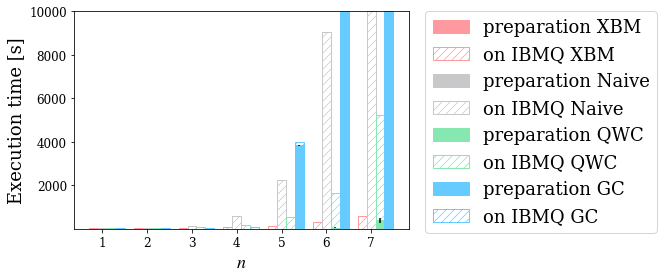

In [9]:
labels = np.arange(len(time_grouping_mean_list))+1

fig, ax = plt.subplots()
bar_width = 0.2
index = np.arange(len(labels))

for i in range(len(methods)):
    c = colors[i]
    barlist_prep = plt.bar(index+i*bar_width, time_grouping_mean_list[:,i], bar_width, yerr=time_grouping_std_list[:,i], label='preparation '+methods[i], color=c, edgecolor=c)
    barlist_ibmq = plt.bar(index+i*bar_width, time_ibmq_mean_list[:,i], bar_width, yerr=time_ibmq_std_list[:,i], bottom=time_grouping_mean_list[:,i], label='on IBMQ '+methods[i], color='white', edgecolor=c, hatch='/'*3)

    for b in barlist_prep:
        b.set_color(colors[i])

plt.xticks(index+bar_width, labels)
plt.xlabel('$n$')
plt.ylabel('Execution time [s]')
plt.ylim(None,10000)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.savefig('summary_time.eps')
plt.savefig('summary_time.pdf')

# $k=3$

In [10]:
nb_qubits_list, abs_errors_mean_list, abs_errors_std_list, rel_errors_mean_list, rel_errors_std_list, time_grouping_mean_list, time_grouping_std_list, time_ibmq_mean_list, time_ibmq_std_list = get_results('results_real_device_kawasaki_', 'qubits_k3.pkl', 2)

results_real_device_kawasaki_2qubits_k3.pkl
results_real_device_kawasaki_3qubits_k3.pkl
results_real_device_kawasaki_4qubits_k3.pkl
results_real_device_kawasaki_5qubits_k3.pkl
results_real_device_kawasaki_6qubits_k3.pkl


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


results_real_device_kawasaki_7qubits_k3.pkl
results_real_device_kawasaki_8qubits_k3.pkl


Text(0, 0.5, 'Absolute error')

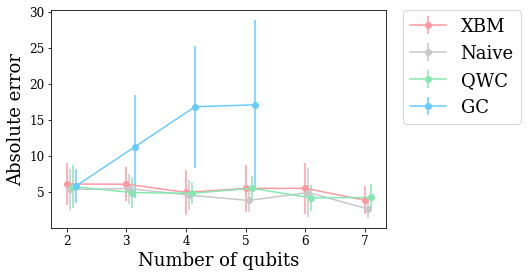

In [11]:
for i in range(len(methods)):
    plt.errorbar(np.array(nb_qubits_list)+i/20., abs_errors_mean_list[:,i], yerr=abs_errors_std_list[:,i], label=methods[i], marker='o', c=colors[i])
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.xlabel('Number of qubits')
plt.ylabel('Absolute error')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


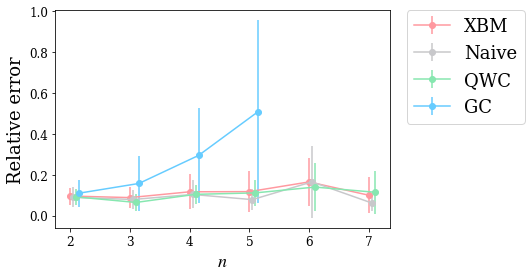

In [12]:
for i in range(len(methods)):
    plt.errorbar(np.array(nb_qubits_list)+i/20., rel_errors_mean_list[:,i], yerr=rel_errors_std_list[:,i], label=methods[i], marker='o', c=colors[i])
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.xlabel('$n$')
plt.ylabel('Relative error')
plt.savefig('real-device-band.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


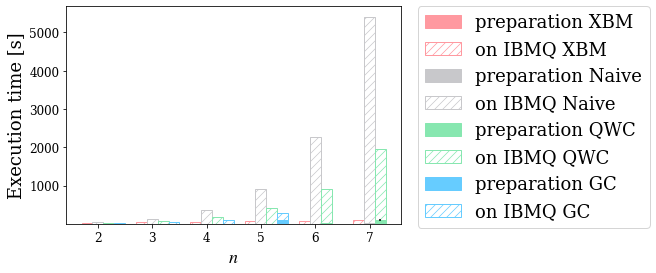

In [13]:
import matplotlib as mpl

mpl.rcParams['hatch.linewidth'] = 0.7

labels = np.arange(len(time_grouping_mean_list))+2

fig, ax = plt.subplots()
bar_width = 0.2
index = np.arange(len(labels))

for i in range(len(methods)):
    c = colors[i]
    barlist_prep = plt.bar(index+i*bar_width, time_grouping_mean_list[:,i], bar_width, yerr=time_grouping_std_list[:,i], label='preparation '+methods[i], color=c, edgecolor=c)
    barlist_ibmq = plt.bar(index+i*bar_width, time_ibmq_mean_list[:,i], bar_width, yerr=time_ibmq_std_list[:,i], bottom=time_grouping_mean_list[:,i], label='on IBMQ '+methods[i], color='white', edgecolor=c, hatch='/'*3)

    for b in barlist_prep:
        b.set_color(colors[i])

plt.xticks(index+bar_width, labels)
plt.xlabel('$n$')
plt.ylabel('Execution time [s]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.savefig('real-device-band-time.eps')
plt.savefig('real-device-band-time.pdf')

# $\psi_0\neq\psi_1$

In [14]:
nb_qubits_list, abs_errors_mean_list, abs_errors_std_list, rel_errors_mean_list, rel_errors_std_list, time_grouping_mean_list, time_grouping_std_list, time_ibmq_mean_list, time_ibmq_std_list = get_results('results_real_device_kawasaki_', 'qubits_psi0psi1.pkl')

results_real_device_kawasaki_1qubits_psi0psi1.pkl
results_real_device_kawasaki_2qubits_psi0psi1.pkl
results_real_device_kawasaki_3qubits_psi0psi1.pkl
results_real_device_kawasaki_4qubits_psi0psi1.pkl
results_real_device_kawasaki_5qubits_psi0psi1.pkl


Text(0, 0.5, 'Absolute error')

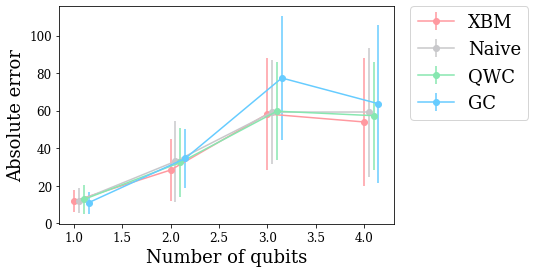

In [15]:
for i in range(len(methods)):
    plt.errorbar(np.array(nb_qubits_list)+i/20., abs_errors_mean_list[:,i], yerr=abs_errors_std_list[:,i], label=methods[i], marker='o', c=colors[i])
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.xlabel('Number of qubits')
plt.ylabel('Absolute error')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


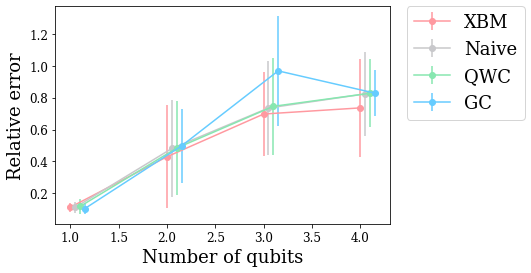

In [16]:
for i in range(len(methods)):
    plt.errorbar(np.array(nb_qubits_list)+i/20., rel_errors_mean_list[:,i], yerr=rel_errors_std_list[:,i], label=methods[i], marker='o', c=colors[i])
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.xlabel('Number of qubits')
plt.ylabel('Relative error')
plt.savefig('summary_error_psi0psi1.eps')

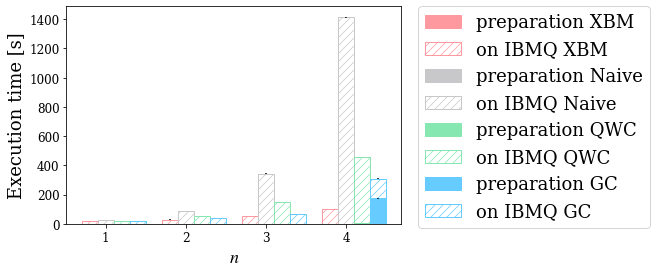

In [17]:
import matplotlib as mpl

mpl.rcParams['hatch.linewidth'] = 0.7

labels = np.arange(len(time_grouping_mean_list))+1

fig, ax = plt.subplots()
bar_width = 0.2
index = np.arange(len(labels))

for i in range(len(methods)):
    c = colors[i]
    barlist_prep = plt.bar(index+i*bar_width, time_grouping_mean_list[:,i], bar_width, yerr=time_grouping_std_list[:,i], label='preparation '+methods[i], color=c, edgecolor=c)
    barlist_ibmq = plt.bar(index+i*bar_width, time_ibmq_mean_list[:,i], bar_width, yerr=time_ibmq_std_list[:,i], bottom=time_grouping_mean_list[:,i], label='on IBMQ '+methods[i], color='white', edgecolor=c, hatch='/'*3)

    for b in barlist_prep:
        b.set_color(colors[i])

plt.xticks(index+bar_width, labels)
plt.xlabel('$n$')
plt.ylabel('Execution time [s]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.savefig('summary_time_psi0psi1.pdf')